In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler


In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

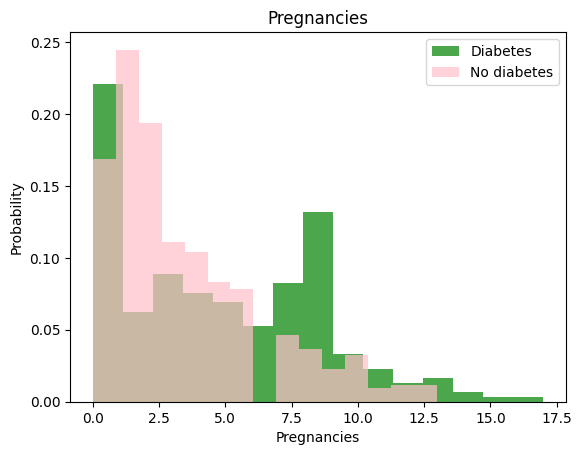

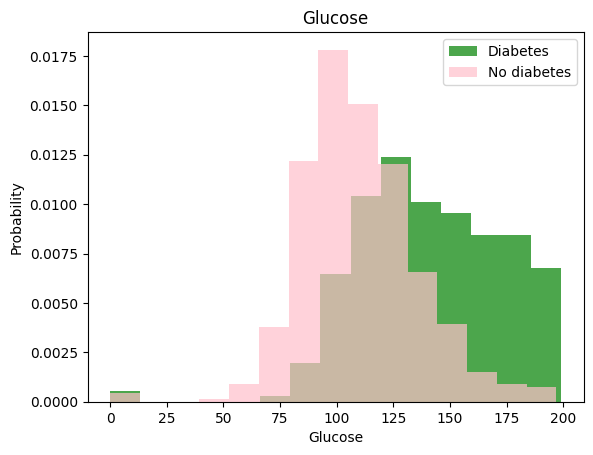

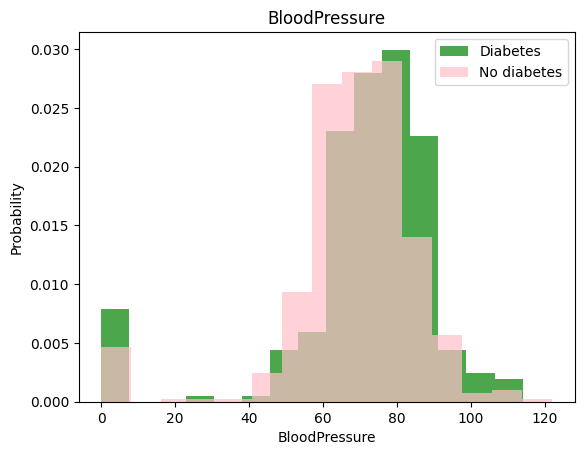

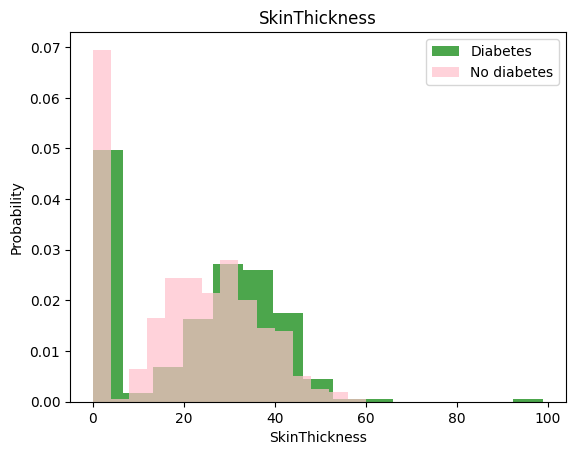

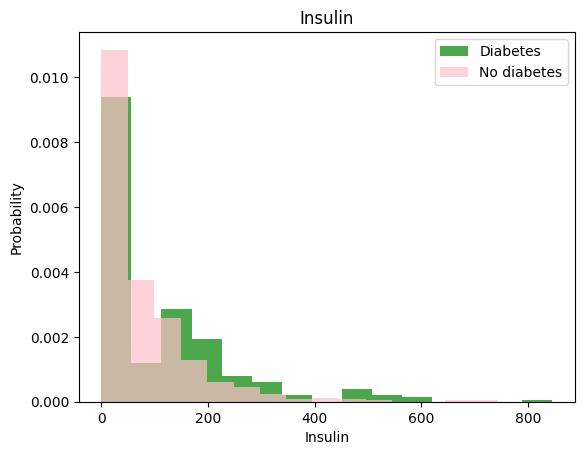

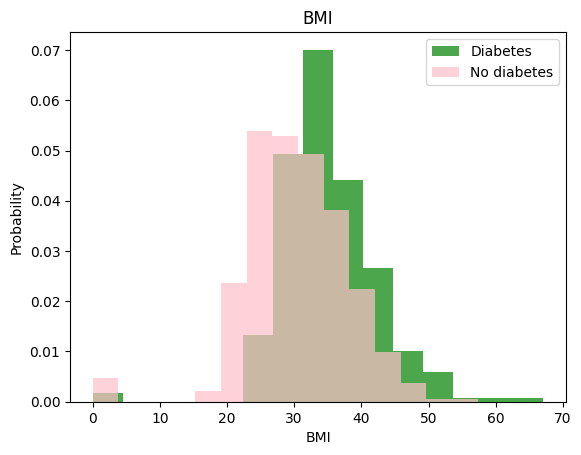

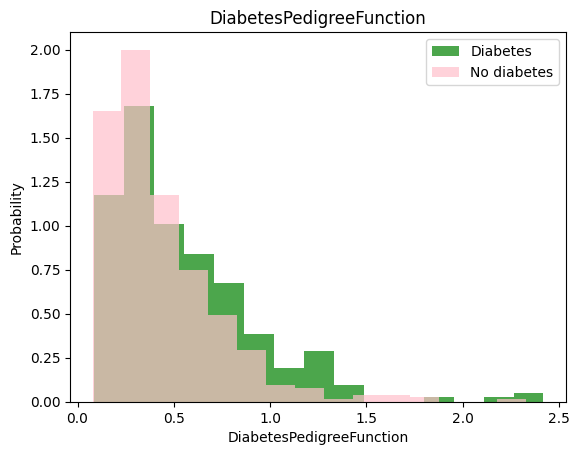

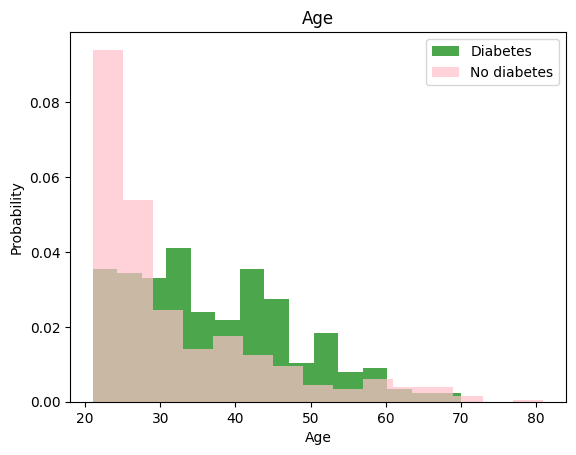

In [9]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='green', label="Diabetes", alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color='pink', label="No diabetes", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [10]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [11]:
X.shape, y.shape

((768, 8), (768,))

In [12]:
scaler = StandardScaler()  #adjust the parameters in the dataset to make them more standardized
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [13]:
over = RandomOverSampler()   #adjust the dataset so that diabetic and non diabetic patients are equal for accurate results
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)


In [14]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])
#check the number of diabetic and non diabetic patients

(500, 500)

In [15]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)   #split the dataset into training and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [16]:
model = tf.keras.Sequential([   #rwrite the neural network for the model
                             tf.keras.layers.Dense(16, activation='relu'), # if x <= 0 --> 0, x > 0 --> x
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  #compile the model using adam optimizer
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [18]:
model.evaluate(X_train, y_train) #run the model on the training sets

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4526 - loss: 0.8169


[0.8059743642807007, 0.46666666865348816]

In [19]:
model.evaluate(X_valid, y_valid) #run the model on the validation set

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4641 - loss: 0.7523 


[0.7921290397644043, 0.45500001311302185]

In [20]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid)) #run the reuslts

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5048 - loss: 0.7461 - val_accuracy: 0.5650 - val_loss: 0.6829
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6147 - loss: 0.6701 - val_accuracy: 0.6350 - val_loss: 0.6386
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6872 - loss: 0.6260 - val_accuracy: 0.7100 - val_loss: 0.6085
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7395 - loss: 0.5916 - val_accuracy: 0.7450 - val_loss: 0.5844
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7480 - loss: 0.5727 - val_accuracy: 0.7350 - val_loss: 0.5651
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7226 - loss: 0.5797 - val_accuracy: 0.7450 - val_loss: 0.5461
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7571 - loss: 0.5400 - val_accuracy: 0.7600 - val_loss: 0.5302
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7283 - loss: 0.5514 - val_accuracy: 0.7650 - val_loss:

In [21]:
model.evaluate(X_test, y_test) #run the model on the test set

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8153 - loss: 0.4474 


[0.4726581871509552, 0.7950000166893005]